In [1]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import export_graphviz
import pydotplus
import pandas as pd
import numpy as np

In [2]:
df_mould = pd.read_csv('D:\\桌面\\Train_Mould\\CH_Y.csv')
df_mould.head(10)


,Unnamed: 0,Timestamp,Z1_mean,Z1_max,Z1_min,Z1_std,Z1_skew,Z1_kurtosis,Z1_peakTopeak,Z1_RMS,...,Current_max,Product,Production,Active_time(H),Utilization_capacity(T/H),Hole_size,Cutters,Clean_mould,work_stat,Mould_life
0,0,2020/8/6 00:00,0.169920,0.632324,-0.288086,0.056986,0.097843,11.729121,0.920410,0.180677,...,0,0,0.0,0.0,0.0,0,0,0,0,3
1,1,2020/8/6 00:01,0.171129,0.625000,-0.272217,0.054116,0.380044,12.547399,0.897217,0.181634,...,0,0,0.0,0.0,0.0,0,0,0,0,3
2,2,2020/8/6 00:02,0.171056,0.611572,-0.272217,0.054945,0.275383,13.143974,0.883789,0.180369,...,0,0,0.0,0.0,0.0,0,0,0,0,3
3,3,2020/8/6 00:03,0.169828,0.572510,-0.267334,0.057269,0.091348,10.469897,0.839844,0.180933,...,0,0,0.0,0.0,0.0,0,0,0,0,3
4,4,2020/8/6 00:04,0.171111,0.588379,-0.280762,0.053189,0.408062,13.450596,0.869141,0.180843,...,0,0,0.0,0.0,0.0,0,0,0,0,3
5,5,2020/8/6 00:05,0.170881,0.578613,-0.264893,0.053314,0.138687,13.621012,0.843506,0.179977,...,0,0,0.0,0.0,0.0,0,0,0,0,3
6,6,2020/8/6 00:06,0.170905,0.554199,-0.280762,0.053517,0.073969,13.076935,0.834961,0.179814,...,0,0,0.0,0.0,0.0,0,0,0,0,3
7,7,2020/8/6 00:07,0.171073,0.585938,-0.277100,0.055524,0.093572,12.013246,0.863037,0.180230,...,0,0,0.0,0.0,0.0,0,0,0,0,3
8,8,2020/8/6 00:08,0.170987,0.632324,-0.277100,0.055153,0.139478,12.747721,0.909424,0.180380,...,0,0,0.0,0.0,0.0,0,0,0,0,3
9,9,2020/8/6 00:09,0.170975,0.578613,-0.288086,0.053753,0.005012,13.229906,0.866699,0.179601,...,0,0,0.0,0.0,0.0,0,0,0,0,3


In [3]:
df_mould.columns

Index(['Unnamed: 0', 'Timestamp', 'Z1_mean', 'Z1_max', 'Z1_min', 'Z1_std',
       'Z1_skew', 'Z1_kurtosis', 'Z1_peakTopeak', 'Z1_RMS', 'Z1_crestFactor',
       'Z1_shapeFactor', 'Z1_impulseFactor', 'Z1_marginFactor',
       'energy_Signal', 'spectrum_Mean', 'spectrum_Std', 'spectrum_Skew',
       'spectrum_Kur', 'machine_Status_avg', 'Temperature_avg', 'Current_avg',
       'Current_max', 'Product', 'Production', 'Active_time(H)',
       'Utilization_capacity(T/H)', 'Hole_size', 'Cutters', 'Clean_mould',
       'work_stat', 'Mould_life'],
      dtype='object')

In [4]:
#X = df_mould.iloc[:,1:24]
X = df_mould[['Z1_mean', 'Z1_max', 'Z1_min', 'Z1_std', 'Z1_skew',
       'Z1_kurtosis', 'Z1_peakTopeak', 'Z1_RMS', 'Z1_crestFactor',
       'Z1_shapeFactor', 'Z1_impulseFactor', 'Z1_marginFactor',
       'energy_Signal', 'spectrum_Mean', 'spectrum_Std', 'spectrum_Skew',
       'spectrum_Kur','Temperature_avg', 'Current_avg',
       'Current_max', 'Product', 'Production', 'Active_time(H)',
       'Utilization_capacity(T/H)', 'Hole_size', 'Cutters', 'Clean_mould',
       'work_stat']]
y = df_mould['Mould_life']

X = df_mould[['Z1_mean', 'Z1_max', 'Z1_min', 'Z1_std', 'Z1_skew',
       'Z1_kurtosis', 'Z1_peakTopeak', 'Z1_RMS', 'Z1_crestFactor',
       'Z1_shapeFactor', 'Z1_impulseFactor', 'Z1_marginFactor',
       'energy_Signal', 'spectrum_Mean', 'spectrum_Std', 'spectrum_Skew',
       'spectrum_Kur','Temperature_avg', 'Current_avg',
       'Current_max', 'Product', 'Production', 'Active_time(H)',
       'Utilization_capacity(T/H)', 'Hole_size', 'Cutters', 'Clean_mould',
       'work_stat']]

In [5]:
X

,Z1_mean,Z1_max,Z1_min,Z1_std,Z1_skew,Z1_kurtosis,Z1_peakTopeak,Z1_RMS,Z1_crestFactor,Z1_shapeFactor,...,Current_avg,Current_max,Product,Production,Active_time(H),Utilization_capacity(T/H),Hole_size,Cutters,Clean_mould,work_stat
0,0.169920,0.632324,-0.288086,0.056986,0.097843,11.729121,0.920410,0.180677,3.499743,1.043844,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0
1,0.171129,0.625000,-0.272217,0.054116,0.380044,12.547399,0.897217,0.181634,3.440979,1.040317,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0
2,0.171056,0.611572,-0.272217,0.054945,0.275383,13.143974,0.883789,0.180369,3.390671,1.041200,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0
3,0.169828,0.572510,-0.267334,0.057269,0.091348,10.469897,0.839844,0.180933,3.164207,1.044930,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0
4,0.171111,0.588379,-0.280762,0.053189,0.408062,13.450596,0.869141,0.180843,3.253531,1.038958,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,0.170821,0.588379,-0.324707,0.060303,0.183394,12.013803,0.913086,0.181652,3.239053,1.047573,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0
4316,0.169787,0.609131,-0.295410,0.056697,0.014228,13.596269,0.904541,0.180940,3.366489,1.042111,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0
4317,0.169809,0.643311,-0.306396,0.057768,0.104474,13.318270,0.949707,0.181319,3.547957,1.043635,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0
4318,0.169682,0.590820,-0.280762,0.055091,0.350928,11.642591,0.871582,0.180582,3.271755,1.042260,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0


In [6]:
y

0       3
1       3
2       3
3       3
4       3
       ..
4315    3
4316    3
4317    3
4318    3
4319    3
Name: Mould_life, Length: 4320, dtype: int64

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=40)

In [8]:
#決策樹
#clf = DecisionTreeClassifier(criterion = 'entropy',max_depth = 15,min_samples_split=10,random_state = 30)
clf = DecisionTreeClassifier(max_depth = 8,min_samples_leaf = 5)

clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
clf_pred = clf.predict(X_test)

In [11]:
clf.score(X_test,y_test)

0.9305555555555556

In [12]:
#混沌矩陣
print(confusion_matrix(y_test,clf_pred))
#分類器數值
print(classification_report(y_test,clf_pred))

[[238   0   0  57]
 [  0  46   0   1]
 [  0   5  48   1]
 [ 24   2   0 874]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.85       295
           1       0.87      0.98      0.92        47
           2       1.00      0.89      0.94        54
           3       0.94      0.97      0.95       900

    accuracy                           0.93      1296
   macro avg       0.93      0.91      0.92      1296
weighted avg       0.93      0.93      0.93      1296



In [13]:
# Draw_tree = tree.export_graphviz(clf,out_file=None)
# graph = pydotplus.graph_from_dot_data(Draw_tree)
# graph.write_pdf('model_test_8.pdf')

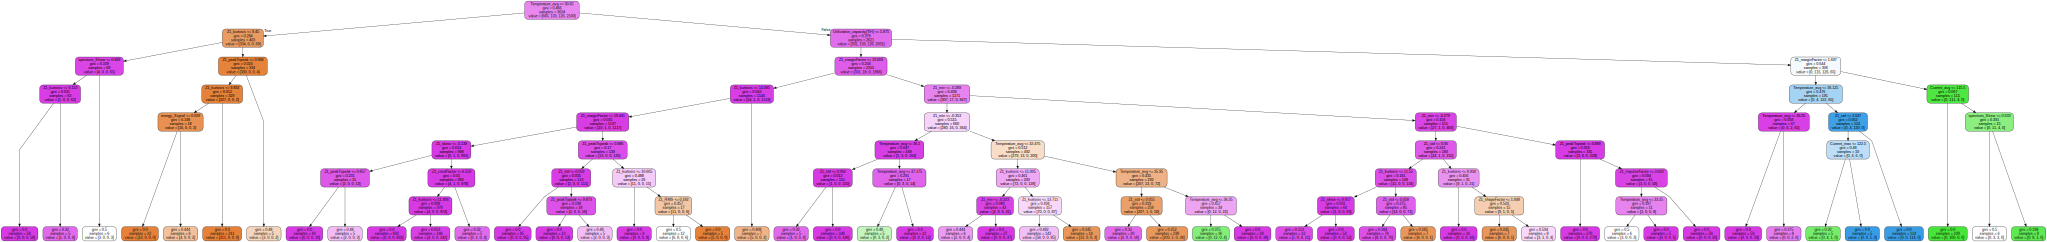

In [14]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=['Z1_mean', 'Z1_max', 'Z1_min', 'Z1_std', 'Z1_skew',
       'Z1_kurtosis', 'Z1_peakTopeak', 'Z1_RMS', 'Z1_crestFactor',
       'Z1_shapeFactor', 'Z1_impulseFactor', 'Z1_marginFactor',
       'energy_Signal', 'spectrum_Mean', 'spectrum_Std', 'spectrum_Skew',
       'spectrum_Kur','Temperature_avg', 'Current_avg',
       'Current_max', 'Product', 'Production', 'Active_time(H)',
       'Utilization_capacity(T/H)', 'Hole_size', 'Cutters', 'Clean_mould',
       'work_stat'],
                     
                     filled=True, rounded=True, leaves_parallel=True)

graph = graphviz.Source(dot_data)
graph

In [15]:
Draw_tree = tree.export_graphviz(clf, out_file=None,
                     feature_names=['Z1_mean', 'Z1_max', 'Z1_min', 'Z1_std', 'Z1_skew',
       'Z1_kurtosis', 'Z1_peakTopeak', 'Z1_RMS', 'Z1_crestFactor',
       'Z1_shapeFactor', 'Z1_impulseFactor', 'Z1_marginFactor',
       'energy_Signal', 'spectrum_Mean', 'spectrum_Std', 'spectrum_Skew',
       'spectrum_Kur','Temperature_avg', 'Current_avg',
       'Current_max', 'Product', 'Production', 'Active_time(H)',
       'Utilization_capacity(T/H)', 'Hole_size', 'Cutters', 'Clean_mould',
       'work_stat'],
                     
                     filled=True, rounded=True,impurity=False)
graph1 = pydotplus.graph_from_dot_data(Draw_tree)
graph1.write_pdf('Decision666_test.pdf')

True

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [17]:
#隨機森林
regr = RandomForestRegressor()

In [18]:
regr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [19]:
regr.score(X_test,y_test)

0.8127429127457791

In [20]:
clf_pred = clf.predict(X_test)

In [21]:
#混沌矩陣
print(confusion_matrix(y_test,clf_pred))
#分類器數值
print(classification_report(y_test,clf_pred))

[[238   0   0  57]
 [  0  46   0   1]
 [  0   5  48   1]
 [ 24   2   0 874]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.85       295
           1       0.87      0.98      0.92        47
           2       1.00      0.89      0.94        54
           3       0.94      0.97      0.95       900

    accuracy                           0.93      1296
   macro avg       0.93      0.91      0.92      1296
weighted avg       0.93      0.93      0.93      1296

